**GRIP(MAY 2021)- The Sparks Foundation**

**Data Science And Business Analytics**

**BY: Binit Kumar Singh** 

**Task 2: Prediction using Decision Tree Algorithm**

**Importing libraries**

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

**Loading the dataset**

In [44]:
iris = datasets.load_iris()
df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

**Getting Insights of the Data**

In [45]:
df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
df.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
dtype: int64

**For better data visualisation creating a new column named "Species" so as to map integral values(here given [0,1,2]) to corresponding  target ones**

In [47]:
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])

In [48]:
df.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Let's check the behaviour of attributes among themselves and with other parameters too!** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5018b92d0>,
      dtype=object)

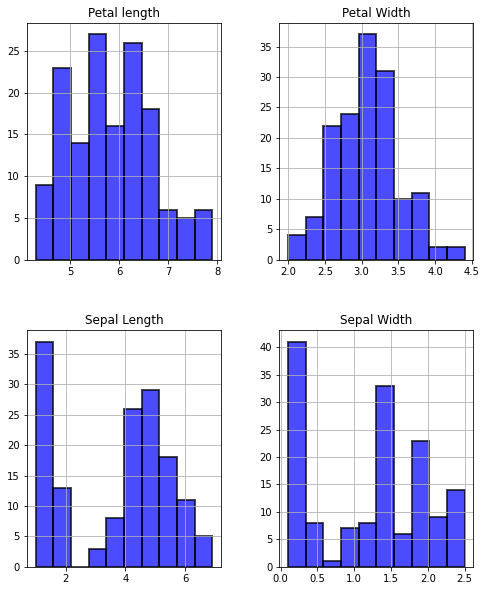

In [63]:
df.hist(color='blue', alpha=0.7, label='Value', edgecolor='black', linewidth=2, figsize=(8,10))

**Finding the relations among the features**

**plotting pairplot** 

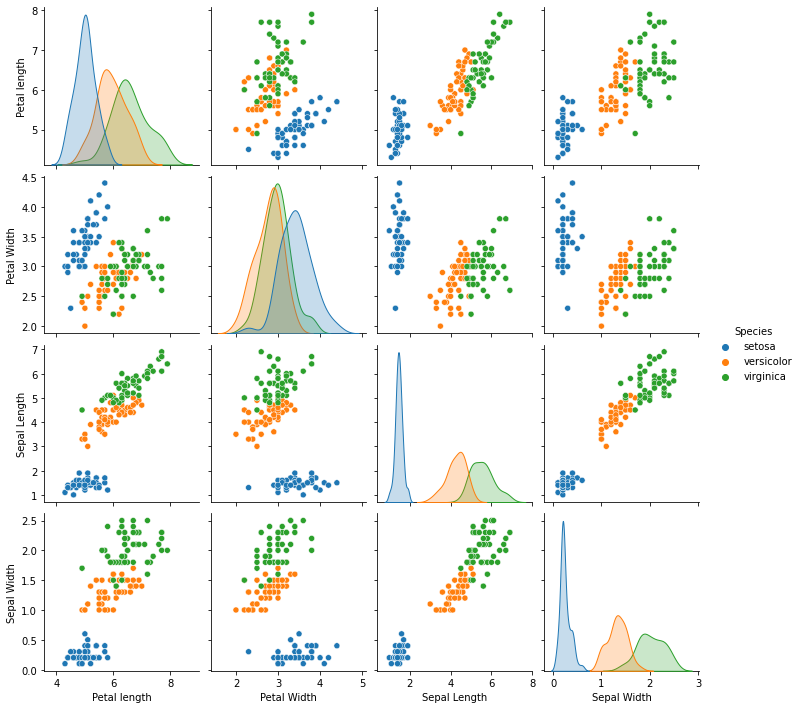

In [50]:
sns.pairplot(df, hue = 'Species')
plt.show()

**For further analysis, plotting of correlation matrix performed**

[]

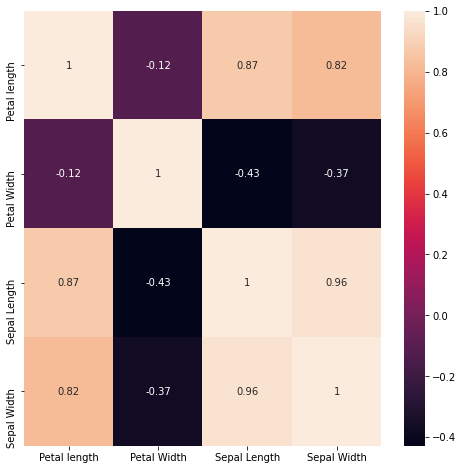

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [52]:
df.corr()

,Petal length,Petal Width,Sepal Length,Sepal Width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal Width,-0.117570,1.000000,-0.428440,-0.366126
Sepal Length,0.871754,-0.428440,1.000000,0.962865
Sepal Width,0.817941,-0.366126,0.962865,1.000000


**From above analysis we can see that there is a string correlation among petal width and petal length with no correlation among sepal length and width.**

**Applying a bit more feature Engineering to the data**

In [53]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3)

x_train=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
y_train=train.Species

x_test=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
y_test=test.Species

**Importing Decision Tree and applying it the Data**

In [54]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=15)
model = clf.fit(x_train, y_train)

**Accuracy check of the model!**

In [68]:
clf.score(x_test,y_test)

1.0

In [55]:
clf.predict(x_test)

array(['setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica'], dtype=object)

In [60]:
clf.predict([[3.5, 2.6, 5.3, 2.4]])


array(['virginica'], dtype=object)

**Therefore now plotting the decision tree**

In [56]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


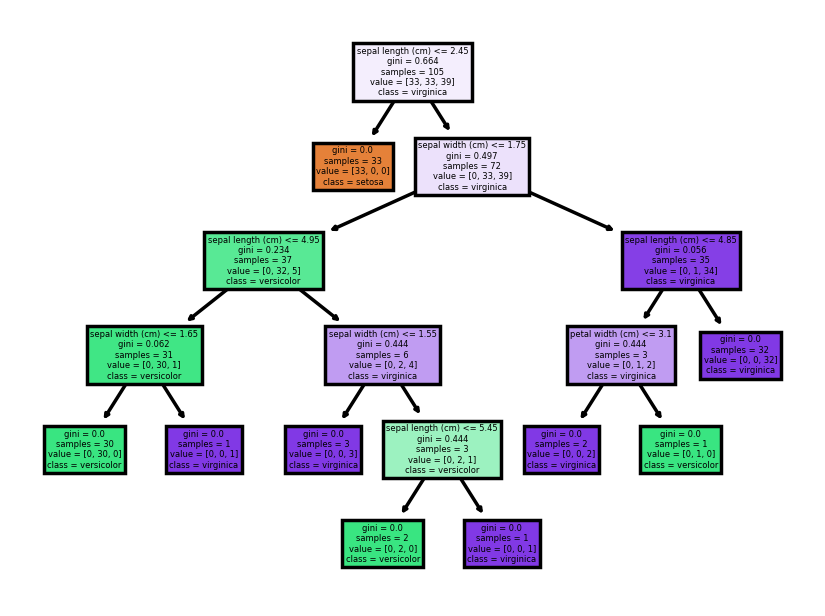

In [57]:
=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=250)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('img1.png')

In [59]:
clf.predict([[3.6, 3.9, 2.6, 5.3]])

array(['versicolor'], dtype=object)